# Part 1

Shortest distances from Arad
Arad: 0
Zerind: 75.0
Timisoara: 118.0
Oradea: 146.0
Lugoj: 229.0
Mehadia: 299.0
Drobeta: 374.0
Sibiu: 140.0
Rimnicu V: 220.0
Craiova: 366.0
Fagaras: 239.0
Pitesti: 317.0
Bucharest: 418.0
Giurgiu: 508.0
Urziceni: 503.0
Hirsova: 601.0
Eforie: 687.0
Vaslui: 645.0
Iasi: 737.0
Neamt: 834.0


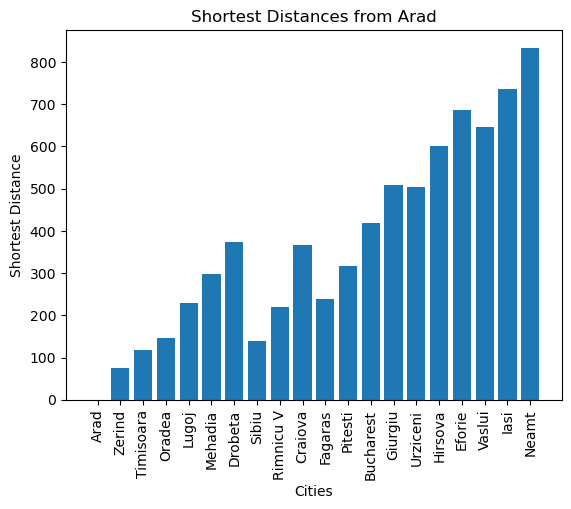

In [6]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def dijkstra(adjacency_matrix, source):
    num_vertices = len(adjacency_matrix)
    dist = [float('inf')] * num_vertices
    dist[source] = 0

    visited = set()

    while len(visited) != num_vertices:
        min_dist = float('inf')
        min_index = -1
        for v in range(num_vertices):
            if v not in visited and dist[v] < min_dist:
                min_dist = dist[v]
                min_index = v

        visited.add(min_index)

        for v in range(num_vertices):
            if v not in visited and not np.isnan(adjacency_matrix[min_index][v]):
                new_dist = dist[min_index] + adjacency_matrix[min_index][v]
                if new_dist < dist[v]:
                    dist[v] = new_dist

    return dist

# Read the adjacency matrix from the CSV file
adjacency_matrix = np.genfromtxt(open("./Romania_map.csv"), delimiter=",", skip_header=1, usecols=range(1, 21))
adjacency_matrix[np.isnan(adjacency_matrix)] = np.inf

# Set the source city (e.g., Arad)
source_city = 0

# Run Dijkstra's algorithm
shortest_distances = dijkstra(adjacency_matrix, source_city)

# Print the output
cities = ['Arad', 'Zerind', 'Timisoara', 'Oradea', 'Lugoj', 'Mehadia', 'Drobeta', 'Sibiu', 'Rimnicu V', 'Craiova',
          'Fagaras', 'Pitesti', 'Bucharest', 'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie', 'Vaslui', 'Iasi', 'Neamt']

print("Shortest distances from", cities[source_city])
for i, distance in enumerate(shortest_distances):
    print(cities[i] + ":", distance)

# Plot the output
plt.bar(cities, shortest_distances)
plt.xlabel('Cities')
plt.ylabel('Shortest Distance')
plt.title('Shortest Distances from ' + cities[source_city])
plt.xticks(rotation=90)
plt.show()


# Part 2

In [8]:
import numpy as np
import csv

def dijkstra(adjacency_matrix, source):
    num_vertices = len(adjacency_matrix)
    dist = [float('inf')] * num_vertices
    dist[source] = 0

    visited = set()

    while len(visited) != num_vertices:
        min_dist = float('inf')
        min_index = -1
        for v in range(num_vertices):
            if v not in visited and dist[v] < min_dist:
                min_dist = dist[v]
                min_index = v

        visited.add(min_index)

        for v in range(num_vertices):
            if v not in visited and not np.isnan(adjacency_matrix[min_index][v]):
                new_dist = dist[min_index] + adjacency_matrix[min_index][v]
                if new_dist < dist[v]:
                    dist[v] = new_dist

    return dist


# Read the adjacency matrix from the CSV file
adjacency_matrix = np.genfromtxt(open("./Romania_map.csv"), delimiter=",", skip_header=1, usecols=range(1, 21))
adjacency_matrix[np.isnan(adjacency_matrix)] = np.inf

# Set the source city (e.g., Arad)
source_city = 0

# Get the number of cities
num_cities = len(adjacency_matrix)

# Initialize the result matrix
result_matrix = np.zeros((num_cities, num_cities))

# Compute the all-pairs shortest paths
for source in range(num_cities):
    shortest_distances = dijkstra(adjacency_matrix, source)
    result_matrix[source] = shortest_distances

# Write the result to a CSV file
cities = ['Arad', 'Zerind', 'Timisoara', 'Oradea', 'Lugoj', 'Mehadia', 'Drobeta', 'Sibiu', 'Rimnicu V', 'Craiova',
          'Fagaras', 'Pitesti', 'Bucharest', 'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie', 'Vaslui', 'Iasi', 'Neamt']

with open("all_pairs_shortest_paths.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([''] + cities)  # Write the header row
    for i, row in enumerate(result_matrix):
        writer.writerow([cities[i]] + list(row))
